In [30]:
pip install streamlit

  Using cached streamlit-0.84.0-py2.py3-none-any.whl (7.8 MB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached pydeck-0.6.2-py2.py3-none-any.whl (4.2 MB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
  Using cached GitPython-3.1.18-py3-none-any.whl (170 kB)
  Using cached base58-2.1.0-py3-none-any.whl (5.6 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached tzlocal-2.1-py2.py3-none-any.whl (16 kB)
  Using cached watchdog-2.1.3-py3-none-win_amd64.whl (75 kB)
  Using cached validators-0.18.2-py3-none-any.whl (19 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached blinker-1.4.tar.gz (111 kB)
  Using cached toolz-0.11.1-py3-none-any.whl (55 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached ipywidgets-7.6.3-py2.py3-none-any.whl (121 kB)
  Using cached jupyterlab_widgets-1.0.0

In [5]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DataDir = r"C:\\Users\\Admin\\imageclassfication\\images\\"

Categories = ['rose','cricket bat','icecream cone','covid vaccine','chocolate']

for category in Categories:
  class_num = Categories.index(category) #label encoding
  path = os.path.join(DataDir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


In [6]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4])

<BarContainer object of 5 artists>

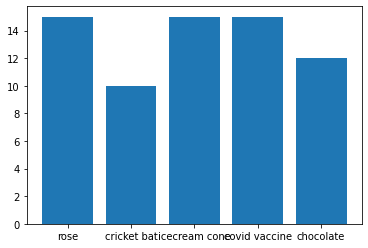

In [8]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc= svm.SVC(probability = True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [13]:
y_pred = clf.predict(x_test)
y_pred

array([3, 0, 0, 4, 0, 1, 0, 2, 3, 3, 3, 2, 0, 4, 2, 1, 0, 1, 1, 0, 0])

Text(0, 0.5, 'Predictions ')

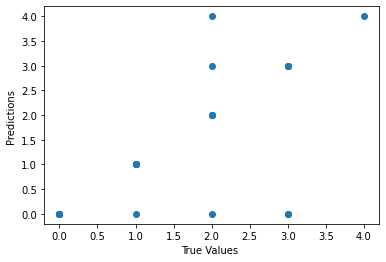

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
accuracy_score(y_pred,y_test)

0.7142857142857143

In [21]:
confusion_matrix(y_pred,y_test)

array([[4, 1, 1, 2, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 1, 3, 0],
       [0, 0, 1, 0, 1]], dtype=int64)

In [22]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [23]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://images.fineartamerica.com/images/artworkimages/mediumlarge/1/strawberry-cherry-ice-cream-cone-donald-erickson.jpg
(900, 600, 3)
predicted Output: icecream cone


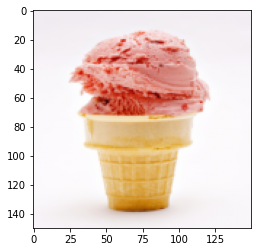

In [24]:
flat_data=[]
url = input("Enter your url")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f'predicted Output: {y_out}')